In [41]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
import skorch
from sklearn.metrics import accuracy_score

In [2]:
data = load_digits()

In [3]:
features = data.images
labels = data.target

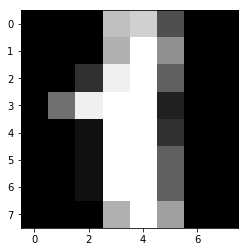

In [9]:
plt.imshow(features[1], cmap="gray")

In [11]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=34, shuffle=True)

In [12]:
x_train = Variable(torch.from_numpy(features_train), requires_grad=False).float()
y_train = Variable(torch.from_numpy(labels_train)).long()

x_test = Variable(torch.from_numpy(features_test), requires_grad=False).float()
y_test = Variable(torch.from_numpy(labels_test)).long()

In [19]:
x_train = x_train.view(1347, -1, 8, 8)
x_test = x_test.view(len(x_test), -1, 8, 8)

In [20]:
print ("Shape of x_train: ", x_train.shape)
print ("Shape of x_test:", x_test.shape)

Shape of x_train:  torch.Size([1347, 1, 8, 8])
Shape of x_test: torch.Size([450, 1, 8, 8])


In [23]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)

In [37]:
net = nn.Sequential(nn.Conv2d(1, 64, kernel_size=3),nn.ReLU(), nn.MaxPool2d(2),nn.ReLU(), nn.Conv2d(64, 18, kernel_size=3),Flatten(), nn.Linear(18, 10))

In [38]:
optimizer=torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs=100

In [42]:
def train():
    net.train()
    for epoch in range(1, epochs):
        optimizer.zero_grad()
        y_pred = net(x_train)
        acc = accuracy_score(labels_train, y_pred.max(1)[1].data.numpy())
        loss = criterion(y_pred, y_train)
        print ("epoch #", epoch)
        print ("loss: ", loss.item())
        print ("acc: ", acc * 100,"%")
        loss.backward()
        optimizer.step()


In [43]:
train()

epoch # 1
loss:  0.3020625710487366
acc:  93.39272457312546 %
epoch # 2
loss:  0.29073968529701233
acc:  93.83815887156645 %
epoch # 3
loss:  0.28075405955314636
acc:  93.9123979213066 %
epoch # 4
loss:  0.27144163846969604
acc:  93.9123979213066 %
epoch # 5
loss:  0.2623262107372284
acc:  94.06087602078694 %
epoch # 6
loss:  0.25330275297164917
acc:  94.43207126948775 %
epoch # 7
loss:  0.24452424049377441
acc:  94.72902746844841 %
epoch # 8
loss:  0.2362017035484314
acc:  94.80326651818856 %
epoch # 9
loss:  0.2284063845872879
acc:  95.02598366740905 %
epoch # 10
loss:  0.22110044956207275
acc:  95.32293986636972 %
epoch # 11
loss:  0.21419909596443176
acc:  95.61989606533037 %
epoch # 12
loss:  0.20765064656734467
acc:  95.7683741648107 %
epoch # 13
loss:  0.20143204927444458
acc:  95.84261321455085 %
epoch # 14
loss:  0.1955357789993286
acc:  96.06533036377134 %
epoch # 15
loss:  0.18993033468723297
acc:  96.13956941351151 %
epoch # 16
loss:  0.1845780611038208
acc:  96.06533036377

In [44]:
predictions = net(x_test).max(1)[1]

In [45]:
accuracy_score(labels_test, predictions.data.numpy())

0.98